#  <font color='orangered'>**Проект  'Принятие решений в бизнесе'**</font> 

   **Цель:**
       Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 


# <font color='orangered'> Оглавление </font> 

1. [Загрузка данных](#start)
2. [Приоритизация гипотез](#hypothesis)
  
    
3. [Анализ A/B-теста](#analyse)

    * [График кумулятивной выручки по группам](#cumulativeData) 
    * [График кумулятивного среднего чека по группам](#cumulativeData1) 
    * [График относительного изменения кумулятивного среднего чека группы B к группе A](#cumulativeData2) 
    * [График кумулятивного среднего количества заказов на посетителя по группам](#cumulativeData3)
    * [График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A](#cumulativeData4)
    * [Точечный график количества заказов по пользляоватем](#cumulativeData5)
    * [95-й и 99-й перцентили количества заказов на пользователя](#cumulativeData6)
    * [Точечный график стоимостей заказов](#cumulativeData5-1)
    * [95-й и 99-й перцентили стоимости заказов](#cumulativeData6-1)
    * [статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным](#cumulativeData7)
    * [статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#cumulativeData8)
    * [статистическая значимостьразличий в среднем количестве заказов на посетителя между группами по «очищенным» данным](#cumulativeData9)
    * [статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.](#cumulativeData10)
    * [решение по результатам теста.](#cumulativeData11)
   
4. [Вывод](#superend")



## Загрузка данных и библиотек <a id="start"></a> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime as dt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
from scipy import stats

In [2]:
hypothesis = pd.read_csv ('/datasets/hypothesis.csv')
orders = pd.read_csv ('/datasets/orders.csv', sep=',')
visitors = pd.read_csv ('/datasets/visitors.csv',  sep=',')

## Приоритизация гипотез <a id="hypothesis"></a> 

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by = ['ICE'], ascending = False).head(3)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000


In [6]:

hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']

hypothesis[['Hypothesis', 'RICE']].sort_values(by = ['RICE'], ascending = False).head(3)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0


In [7]:
(hypothesis[['Hypothesis', 'ICE', 'RICE']]
   .sort_values(by = ['ICE', 'RICE'], ascending = False)
  .style
  .format('{:.2f}', subset = 'ICE')
  .format('{:.2f}', subset = 'RICE')
  .background_gradient(subset=['ICE','RICE'], cmap='Oranges')
  .set_caption('Приоритизация гипотез на основнии расчета ICE и RICE')
  .set_table_styles([{'selector': 'caption', 
                     'props': [('color', 'orangered'), ('font-size', '18px')]
                     }])
)

,Hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.00



 **Вывод:**

<font color='orangered'>**Приоритетные гипотезы, на основании расчета ICE:**</font>

- Запустить акцию, дающую скидку на товар в день рождения (гипотеза 8).
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (гипотеза 0).
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (гипотеза 7).	

<font color='orangered'>**Приоритетные гипотезы, на основании расчета RICE:**</font>

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (гипотеза 7).
- Добавить блоки рекомендации товаров на сайт интернет-магазина, чтобы повысить конверсию и средний чек заказа (гипотеза 2).
- Добавить новый канал привлечения пользователей, чтобы увеличить охват (гипотеза 0).

Приоритетные гипотезы, рассчитанные на основе ICE, отличаются от приоритетных гипотез, рассчитанных на основе RICE, в связи с тем, что при расчете RICE участвует коэффициент reach - охват аудитории. Он максимальный для гипотез 7 и 2.

## Анализ A/B-теста <a id="analyse"></a> 

In [8]:
def analyze_dataframe(df):
    print('\033[1m'+'Общая информация о DataFrame'+'\033[0m')
    print(df.info())
    
    print('\033[1m'+"\nПропуски в данных:"+'\033[0m')
    missing_data = df.isnull().sum()
    print(missing_data[missing_data > 0])
    
    print('\033[1m'+"\nНазвания столбцов:"+'\033[0m')
    print(df.columns.tolist())
    
    print('\033[1m'+"\nПервые пять строк данных:"+'\033[0m')
    print(df.head())
    
    missing_values = df.isnull().sum()
    print('\033[1m'+"\nКоличество пропусков:"+'\033[0m', missing_values[missing_values > 0])

    duplicate_count = df.duplicated().sum()
    print('\033[1m'+"\nКоличество дубликатов:"+'\033[0m', duplicate_count)

In [9]:
analyze_dataframe(orders)

Общая информация о DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Пропуски в данных:
Series([], dtype: int64)

Названия столбцов:
['transactionId', 'visitorId', 'date', 'revenue', 'group']

Первые пять строк данных:
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B

Количество пропусков

In [10]:
orders.rename(columns={
    'transactionId': 'orderId',
    'visitorId': 'userId'  
}, inplace=True)

In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
print ('Минимальная дата в датафрейме orders:', orders['date'].min())

Минимальная дата в датафрейме orders: 2019-08-01 00:00:00


In [13]:
print ('Максимальная дата в датафрейме orders:', orders['date'].max())

Максимальная дата в датафрейме orders: 2019-08-31 00:00:00


In [14]:
unique_users_A = orders[orders['group'] == 'A']['userId'].nunique()
unique_users_B = orders[orders['group'] == 'B']['userId'].nunique()
print(f"\nКоличество уникальных пользователей в группе A: {unique_users_A}")
print(f"Количество уникальных пользователей в группе B: {unique_users_B}")


Количество уникальных пользователей в группе A: 503
Количество уникальных пользователей в группе B: 586


In [15]:
users_a = orders.query('group == "A"')['userId']
users_b = orders.query('group == "B"')['userId']
common_users = set(users_a).intersection(set(users_b))
common_users_df = pd.DataFrame(list(common_users), columns=['userId'])
print("Кол-во пользователей, которые есть в обеих группах:")
print(common_users_df.count())

Кол-во пользователей, которые есть в обеих группах:
userId    58
dtype: int64


По результатам работы с дублирующими пользователями и без было принято решение сохранить их для анализа.

In [18]:
analyze_dataframe(visitors)

Общая информация о DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Пропуски в данных:
Series([], dtype: int64)

Названия столбцов:
['date', 'group', 'visitors']

Первые пять строк данных:
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756

Количество пропусков: Series([], dtype: int64)

Количество дубликатов: 0


In [19]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [20]:
print ('Минимальная дата в датафрейме visitors:', visitors['date'].min())

Минимальная дата в датафрейме visitors: 2019-08-01 00:00:00


In [21]:
print ('Максимальная дата в датафрейме visitors:', visitors['date'].max())

Максимальная дата в датафрейме visitors: 2019-08-31 00:00:00


**Вывод** 

<font color='orangered'>**Для A/B теста было получено 2 таблицы: `orders` и `visitors`:**</font>

- Датафрейм <font color='orangered'>orders</font> содержит 1197 строк данных. Не имеет пропусков. Содержит столбцы `transactionId`, `visitorId`, `date`, `revenue`, `group`. Все столбцы, кроме столбца `date`, содержат корректный тип данных. Тип данных столбца `date` был преобразован.
       
- Датафрейм <font color='orangered'>visitors</font> содержит 62 строки и 3 столбца: `date`, `group`, `visitors`. Не имеет пропусков. Содержит 3 столбца: `date`, `group`, `visitors`. Все столбцы имеют корректный тип данных.

В обоих датафреймах представлен период с 01.08.2019 по 31.08.2019.
     
Кроме того, в результате анализа <font color='orangered'>было обнаружено 58 пользователей, попавших в обе группы:</font> основную и экспериментальную. В классическом A/B тесте пользователь должен оставаться только в одной группе до конца эксперимента, так как происходит размывание результата, и данные невозможно однозначно интерпретировать, поскольку неясно, что конкретно больше повлияло на поведение пользователя. В данном случае был проведен анализ с удалением пользователей и без. В отсутствии этих пользователей меняются выбросы, поэтому <font color='orangered'>было принято решение продолжить эксперимент без удаления пользователей.</font> 

Однако в случае продолжения A/B тестирования рекомендуем более точно описать методологию выборки и настроить архитектуру исследования.
Основные исправления:

### График кумулятивной выручки по группам. <a id="cumulativeData"></a> 

In [22]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
    orders['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'orderId' : 'nunique', 
          'userId' : 'nunique', 
          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [23]:
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [24]:
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

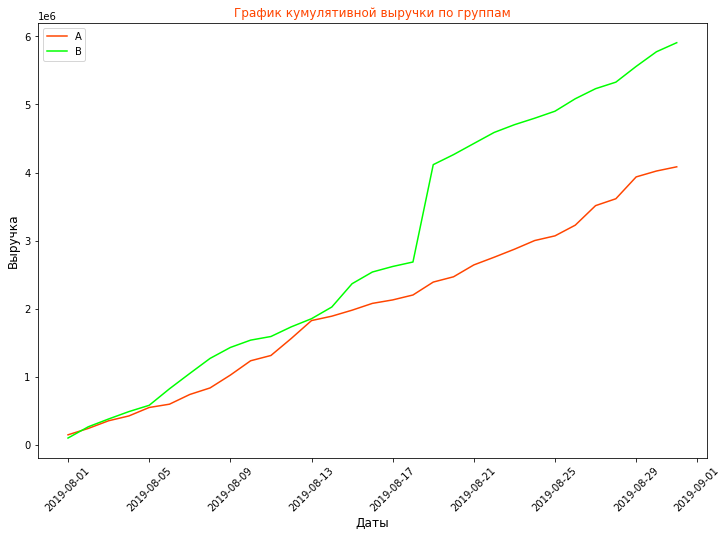

In [25]:
plt.figure(figsize=(12, 8)) 
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], color='orangered', label='A') 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], color='lime', label='B')
plt.title ('График кумулятивной выручки по группам', color='orangered')
plt.xticks(rotation=45)
plt.xlabel('Даты', fontsize=12)  
plt.ylabel('Выручка', fontsize=12) 
plt.legend();

**Вывод**

График кумулятивной выручки (или кумулятивной выручки по группам) в A/B тестах показывает, как меняется выручка со временем. На рисунке видно, что выручка для группы B выше выручки группы A, что позволяет сделать вывод о том, что проведенные изменения оказали положительное влияние. Однако на графике мы также видим резкий рост кумулятивной выручки в определенный момент времени по группе B. Это может сигнализировать о всплесках числа заказов или о появлении очень дорогих заказов в выборке.

 ### График кумулятивного среднего чека по группам. <a id="cumulativeData1"></a> 

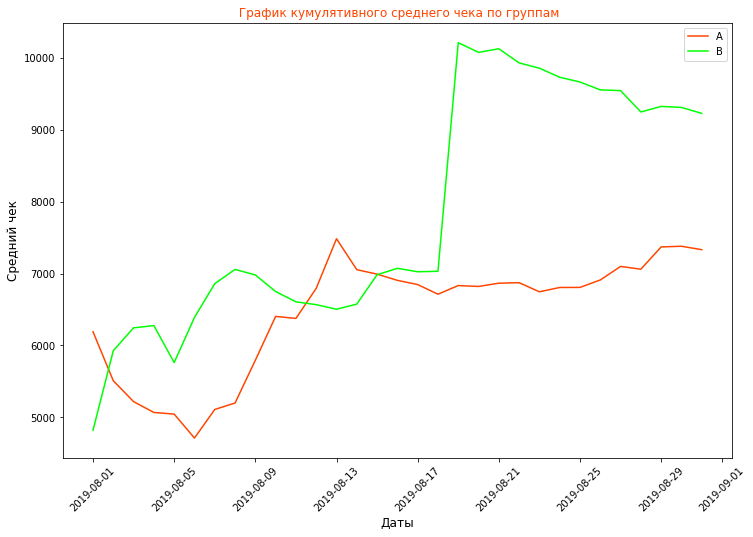

In [26]:
plt.figure(figsize=(12, 8)) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A',  color='orangered')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', color='lime')
plt.title(' График кумулятивного среднего чека по группам', color='orangered')
plt.xticks(rotation=45)
plt.xlabel('Даты', fontsize=12)  
plt.ylabel('Средний чек', fontsize=12)  
plt.legend();

**Вывод**

График кумулятивного среднего чека по группам в A/B тестировании позволяет визуализировать изменения среднего чека (сумма покупок, деленная на количество покупок) для каждой из групп теста с течением времени. Как видно из графика, предпринятые изменения в продукте или ценовой политике оказали положительное влияние, и средний чек по группе B больше среднего чека по группе A. При этом резкий всплеск размера среднего чека в районе 18-19 августа 2019 года свидетельствует о том, что в группу B попали более крупные покупки.

 ### График относительного изменения кумулятивного среднего чека группы B к группе A <a id="cumulativeData2"></a> 


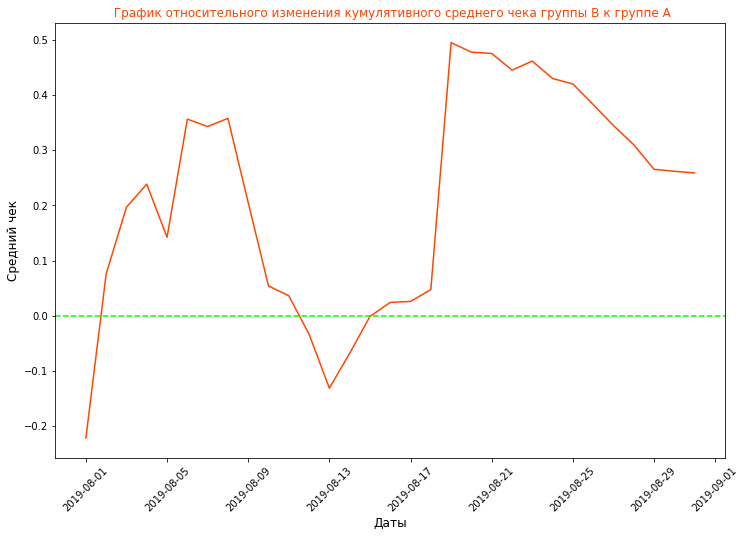

In [27]:
plt.figure(figsize=(12, 8)) 
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,
          color = 'orangered')
plt.axhline(y=0, color='lime', linestyle='--')
plt.title(' График относительного изменения кумулятивного среднего чека группы B к группе A', color='orangered')
plt.xticks(rotation=45)
plt.xlabel('Даты', fontsize=12)  
plt.ylabel('Средний чек', fontsize=12);

**Вывод**

График относительного изменения кумулятивного среднего чека группы B к группе A в A/B тесте позволяет визуализировать, на сколько процентов изменился средний чек группы B по сравнению с группой A в разные моменты времени. Мы видим два пика на графике: 6-7 августа 2019 года (но данный пик связан с уменьшением величины среднего кумулятивного чека по группе A) и 18-19 августа 2019 года, когда кумулятивный средний чек группы B отклонялся от группы A более чем на 40%. Аналогичный всплеск мы видим на двух предыдущих графиках.

### График кумулятивного среднего количества заказов на посетителя по группам <a id="cumulativeData3"></a> 

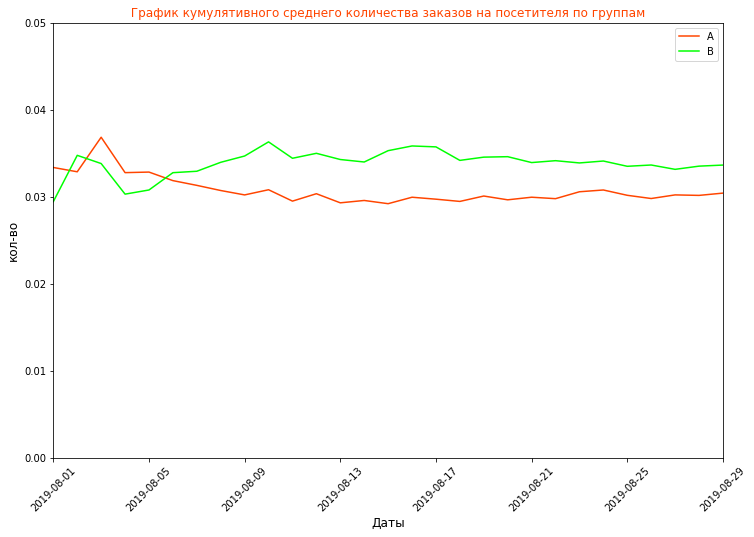

In [28]:
plt.figure(figsize=(12, 8)) 
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color = 'orangered')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color = 'lime')
plt.legend()
plt.xticks(rotation=45)
plt.title(' График кумулятивного среднего количества заказов на посетителя по группам ', color='orangered')
plt.xlabel('Даты', fontsize=12)  
plt.ylabel('кол-во', fontsize=12);
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 29), 0, 0.05]);

**Вывод**

График кумулятивного среднего количества заказов на посетителя по группам в A/B тестировании демонстрирует, как меняется среднее количество заказов, сделанных на одного посетителя, в различных группах. Так, после первоначального всплеска мы можем увидеть на графике, что у группы A примерно 3 заказа на человека, а у группы B — 3,5 заказа, что в целом лучше и говорит об эффективности проведенных изменений.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. <a id="cumulativeData4"></a> 

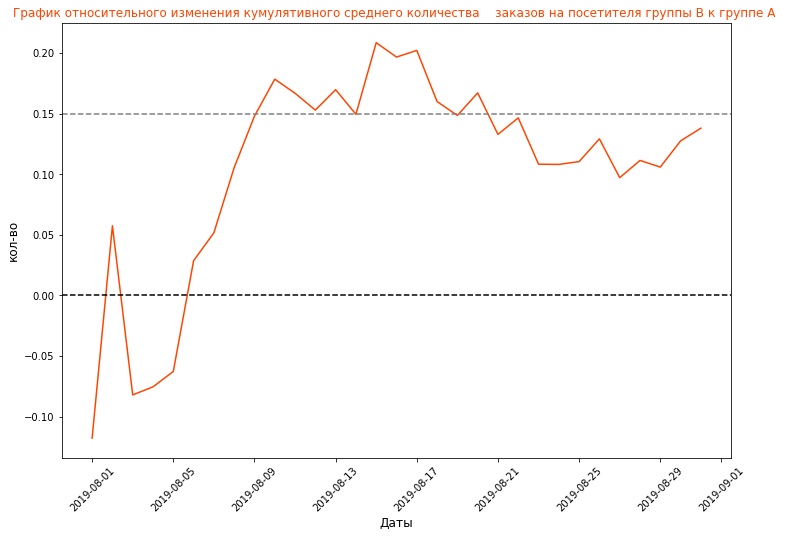

In [29]:
plt.figure(figsize=(12, 8)) 
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, color = 'orangered')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Даты', fontsize=12)  
plt.ylabel('кол-во', fontsize=12);
plt.title('График относительного изменения кумулятивного среднего количества\
    заказов на посетителя группы B к группе A ', color='orangered');


**Вывод**

График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A позволяет анализировать, насколько изменилось среднее количество заказов на посетителя в группе B по сравнению с группой A на протяжении тестового периода в A/B тестировании. Этот график помогает оценить эффект проведенных изменений, который составляет рост среднего чека на 20% в группе B по сравнению с группой A.

### Точечный график количества заказов по пользователям. <a id="cumulativeData5"></a> 

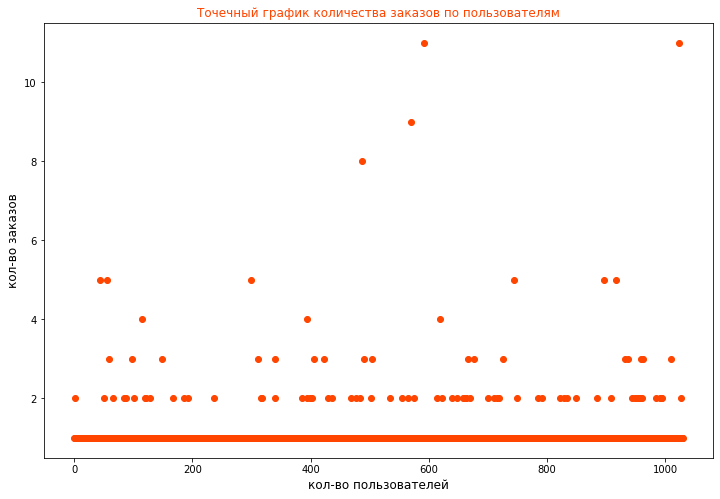

In [30]:
plt.figure(figsize=(12, 8)) 
ordersByUsers = (
   orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0, len(ordersByUsers)))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.title('Точечный график количества заказов по пользователям', color='orangered');
plt.xlabel('кол-во пользователей', fontsize=12)  
plt.ylabel('кол-во заказов', fontsize=12);
plt.scatter(x_values, ordersByUsers['orders'],color = 'orangered');

**Вывод**

Точечный график наглядно показывает, как распределяются заказы между пользователями. Это позволяет сразу увидеть, есть ли выбросы или аномалии в данных. Исходя из графика, видно, что всего 4 пользователя сделали более 7 заказов. Так как принято отсеивать от 1% до 5% аномальных пользователей, уберем их из A/B тестирования.

### 95-й и 99-й перцентили количества заказов на пользователя. <a id="cumulativeData6"></a> 

In [31]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(6))


          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5


In [32]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


**Вывод**

Таким образом, аномальными являются заказы, превышающие 4 заказа. Не более 5% пользователей совершали больше 2 заказов, и не более 1% — больше 4 заказов.

### Точечный график стоимостей заказов. <a id="cumulativeData5-1"></a> 

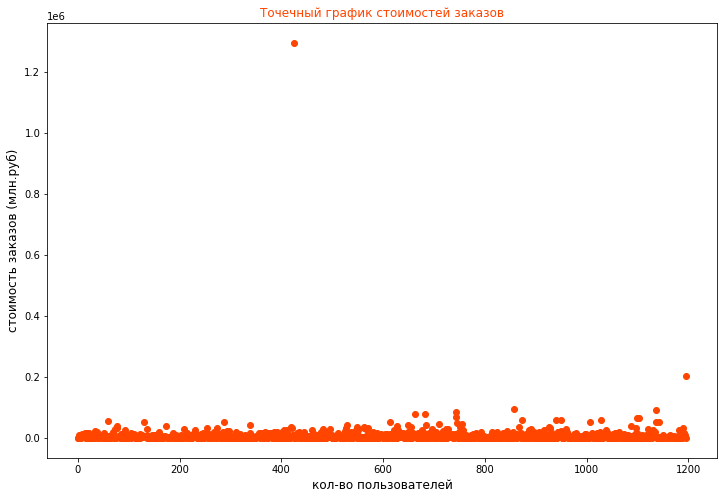

In [33]:
plt.figure(figsize=(12, 8)) 

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color = 'orangered') 

plt.title('Точечный график стоимостей заказов', color='orangered')
plt.xlabel('кол-во пользователей', fontsize=12)  
plt.ylabel('стоимость заказов (млн.руб)', fontsize=12);

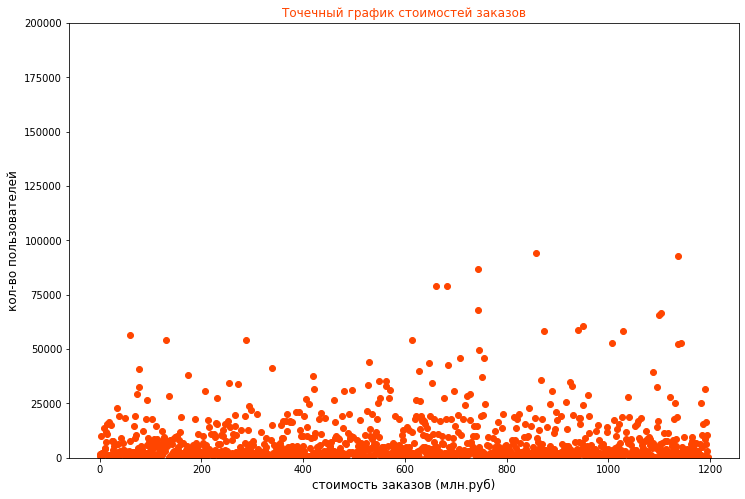

In [34]:
plt.figure(figsize=(12, 8)) 

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color = 'orangered') 
plt.ylim(0, 200000)

plt.title('Точечный график стоимостей заказов', color='orangered')
plt.xlabel('стоимость заказов (млн.руб)', fontsize=12)  
plt.ylabel('кол-во пользователей', fontsize=12);

**Вывод**

Точечный график наглядно показывает, как распределяются стоимости заказов. Это позволяет сразу увидеть, есть ли выбросы или аномалии в данных. Исходя из графика, видно, что существуют выбросы — заказы в районе 1,2 млн руб и 200 тыс. руб.

### 95-й и 99-й перцентили стоимости заказов. <a id="cumulativeData6-1"></a> 

In [35]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

         orderId      userId       date  revenue group
425    590470918  1920142716 2019-08-19  1294500     B
1196  3936777065  2108080724 2019-08-15   202740     B
858    192721366  1316129916 2019-08-27    93940     A
1136   666610489  1307669133 2019-08-13    92550     A
744   3668308183   888512513 2019-08-27    86620     B
682   1216533772  4266935830 2019-08-29    78990     B
662   1811671147  4266935830 2019-08-29    78990     A
743   3603576309  4133034833 2019-08-09    67990     A
1103  1348774318  1164614297 2019-08-12    66350     A
1099   316924019   148427295 2019-08-12    65710     A


In [36]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


**Вывод**

Таким образом, аномальными являются заказы, превышающие 28 тыс. руб. Такие заказы сделали всего 5% пользователей, а заказы свыше 58 тыс. руб. совершали не более 1% пользователей.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. <a id="cumulativeData7"></a> 

Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по сырым данным:

**Формулировка гипотез**:
- H0: статистически значимых различий в среднем количестве заказов на посетителя между группами А и В по «сырым» данным нет.
- H1: статистически значимые различия в среднем количестве заказов на посетителя между группами А и В по «сырым» данным есть.

**Выбор уровня значимости**:
- Выбранный уровень значимости α = 0.05

**Метод проверки гипотез**:
- Будем использовать тест Манна-Уитни для независимых выборок.

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)



ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('относительное различие в среднем между группами', "{0:.3f}".format((sampleB.mean() / sampleA.mean() - 1)))

p-value 0.017
относительное различие в среднем между группами 0.138


**Вывод**

По сырым данным:
- Нулевая гипотеза: различий в среднем количестве заказов между группами нет.
- Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

P-value значительно меньше 5%, поэтому нулевую гипотезу отвергаем. Анализ «сырых данных» показывает, что в среднем количестве заказов между группами нет статистически значимых различий. Относительный прирост среднего количества заказов группы B к конверсии группы A равен 13.8%.


### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. <a id="cumulativeData8"></a> 

Расчет статистической значимости различий в среднем чеке между группами по сырым данным:

**Формулировка гипотез**:
- H0: статистически значимых различий в среднем чеке между группами А и В по «сырым» данным нет.
- H1: статистически значимые различия в среднем чеке между группами А и В по «сырым» данным есть.

**Выбор уровня значимости**:
- Выбранный уровень значимости α = 0.05.

**Метод проверки гипотез**:
- Будем использовать тест Манна-Уитни для независимых выборок.


In [38]:
print('p-value','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительное различие в среднем между группами','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))  

p-value 0.729
относительное различие в среднем между группами 0.259


**Вывод**

По сырым данным:
- Нулевая гипотеза: различий в среднем чеке заказа между группами нет.
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

P-value значительно больше 5%, поэтому нулевую гипотезу не отвергаем. Анализ «сырых данных» показывает, что в среднем чеке между группами нет статистически значимых различий. Относительный прирост среднего чека группы B к среднему чеку группы A равен 25.9%.



### Статистическая значимостьразличий в среднем количестве заказов на посетителя между группами по «очищенным» данным <a id="cumulativeData9"></a> 

Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по очищенным данным:

**Формулировка гипотез**:
- H0: статистически значимых различий в среднем количестве заказов на посетителя между группами А и В по «очищенным» данным нет.
- H1: статистически значимые различия в среднем количестве заказов на посетителя между группами А и В по «очищенным» данным есть.

**Выбор уровня значимости**:
- Выбранный уровень значимости α = 0.05.

**Метод проверки гипотез**:
- Мы будем использовать тест Манна-Уитни для независимых выборок.

In [39]:

order_limit = np.percentile(orders['revenue'], [90, 95, 99])[1]
ordersByUsers_limit = np.percentile(ordersByUsers['orders'], [95, 99])[0]



usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= ordersByUsers_limit]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= ordersByUsers_limit]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > order_limit]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [41]:
print('p-value', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительное различие в среднем между группами', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value 0.016
относительное различие в среднем между группами 0.168


**Вывод**

По очищенным данным:
- Нулевая гипотеза: различий в среднем количестве заказов между группами нет.
- Альтернативная гипотеза: различия в среднем количестве заказов между группами есть.

P-value меньше 5%, поэтому нулевую гипотезу отвергаем. Анализ «очищенных данных» показывает, что различия в среднем количестве заказов между группами действительно существуют. Относительный прирост среднего количества заказов группы B к среднему количеству заказов группы A равен 16.8%.

### статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. <a id="cumulativeData10"></a> 

Расчет статистической значимости различий в среднем чеке между группами по очищенным данным:

**Формулировка гипотез**:
- H0: статистически значимых различий в среднем чеке между группами А и В по «очищенным» данным нет.
- H1: статистически значимые различия в среднем чеке между группами А и В по «очищенным» данным есть.

**Выбор уровня значимости**:
- Выбранный уровень значимости α = 0.05.

**Метод проверки гипотез**:
- Мы будем использовать тест Манна-Уитни для независимых выборок.

In [42]:
print('p-value',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('относительное различие в среднем между группами',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value 0.835
относительное различие в среднем между группами -0.006


**Вывод**

По очищенным данным:
- Нулевая гипотеза: различий в среднем чеке между группами нет.
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

P-value больше 5%, что означает, что различий между группами нет. Относительный прирост среднего чека по очищенным данным составил отрицательное значение -6%.

### Решение по результатам теста. <a id="cumulativeData11"></a> 

По результатам теста я рекомендую продолжить тест. И буду обосновывать свое решение следующим образом:

**Качество данных**: В ходе теста имелись пользователи, которые входили в обе группы (А и Б). Информация о данных пользователях не была удалена, так как это значительно искажало результаты исследования.

**Сравнение общего эффекта**: Необходимо проанализировать, как суммарный эффект от увеличения количества заказов и снижения среднего чека влияет на выручку. Например, если увеличение количества заказов компенсирует снижение среднего чека и приводит к росту общей выручки, это может быть положительным знаком.

**Оценка бизнес-целей**: Необходимо изучение бизнес-целей компании. Так, на этапе роста и захвата рынка рост количества заказов может быть важнее роста среднего чека.

**Анализ поведения пользователей**: Также возможно провести дополнительный анализ, чтобы понять, почему произошло изменение в количестве заказов и среднем чеке. Возможно, стоит исследовать, как изменение повлияло на разные сегменты пользователей.


Расчитаем несколько дополнительных показателей для калькулятора продолжительности АБ тестирования. Так нам нужны показатели среднего кол-ва ежедневных поситителей участвующих в тестировании, а также конверсия.

In [43]:
#расчет среднего количество ежедневных посетителей, которые примут участие в тесте (контроль + вариант)
day_visit = visitors.groupby('date', as_index=False).agg({'visitors': 'sum'})
visitors_daily = day_visit.mean()
print('среднее число посетителей сайта', "{0:.0f}".format(visitors_daily[0]))

среднее число посетителей сайта 1215


In [44]:
print ('конверсия', "{0:.0f}".format((orders['orderId'].nunique()/visitors['visitors'].sum())*100), '%')

конверсия 3 %


## Вывод <a id="superend"></a> 

<span style="color:orangered">**Данный АБ тест можно признать успешным и ввести новшество в бизнес-модель.**</span>

**Этапы проведения исследования:**

1. Для А/В теста было получено 2 таблицы: `orders` и `visitors`, содержащие 1197 и 62 строки соответственно. В обоих датафреймах столбец `date` содержал некорректный тип данных.

2. В ходе исследования были обнаружены проблемы с осуществлением выборки. Так, 58 пользователей попали в обе группы исследования: основную и экспериментальную. Данное обстоятельство может размывать результаты и влиять на расчет последующих метрик.

3. Анализ данных по обеим группам следующий. Выручка для группы B выше выручки группы A, что позволяет сделать выводы о том, что проведенные изменения оказали положительное влияние. Однако на графике мы также видим резкий рост кумулятивной выручки в определенный момент времени. Об имеющихся выбросах в районе 18-19 августа 2019 года также свидетельствует резкий скачок размера среднего чека в группе B. График относительного изменения кумулятивного среднего чека группы B к группе A в A/B тесте также свидетельствует о росте среднего чека в группе B относительно группы A до 40% в вышеуказанный период времени, тогда как аналогичный показатель в отношении количества заказов составил всего 20%.

4. Далее была произведена оценка имеющихся выбросов, и установлено, что аномальным является осуществление более 4 заказов (не более 5% пользователей совершали больше 2 заказов) и осуществление заказов на сумму более 28 тыс. руб. (не более 5% пользователей совершали подобные заказы).

5. Далее была произведена оценка статистической значимости в среднем количестве заказов и среднем чеке по сырым и очищенным (от аномальных пользователей) данным:

   **По сырым данным:** в среднем количестве заказов между группами нет статистически значимых различий. Относительный прирост среднего количества заказов группы B к конверсии группы A равен 13.8%. В среднем чеке различий между группами нет. Относительный прирост среднего чека группы B к среднему чеку группы A равен 25.9%.
   
   **По очищенным данным:** различия в среднем количестве заказов между группами есть. Относительный прирост среднего количества заказов группы B к среднему количеству группы A равен 16.8%. Различий в среднем чеке между группами нет. Относительный прирост среднего чека по очищенным данным составил отрицательное значение -6%.


